# Визуализация друзей ВКонтакте

Основано на статье с хабра [Введение в анализ социальных сетей на примере VK API](https://habrahabr.ru/company/ods/blog/263313/).

In [1]:
import requests

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Получение информации о пользователях 

In [2]:
def get_friends(user_id, with_name=False):
    fields = 'first_name,last_name' if with_name else ''
    url = 'https://api.vk.com/method/friends.get?' + \
                        'user_id={}&fields={}&v=5.73'.format(user_id, fields)
    response = requests.get(url).json()
    if response.get('error'):
        print(response.get('error'))
        return []
    return response.get('response').get('items')

In [3]:
CENTRAL_USER_ID = 0
central_users = get_friends(CENTRAL_USER_ID, with_name=True)
central_users = {user_dict['id']: user_dict.get('first_name') + \
                ' ' + user_dict.get('last_name') for user_dict in central_users}

central_users[CENTRAL_USER_ID] = 'Я'

In [4]:
graph = {}

for user_id in central_users.keys():
#     print('Processing id:', user_id)
    graph[user_id] = get_friends(user_id)

In [5]:
unique_users = set(graph.keys())

for user_friends in graph.values():
    unique_users.update(user_friends)

print('Всего получено различных пользователей ВКонтакте:', len(unique_users))

Всего получено различных пользователей ВКонтакте: 19285


# Граф

### С центральной вершиной

In [6]:
g = nx.Graph()
for user_id, user_friends in graph.items():
    g.add_node(central_users[user_id])
    for friend_id in user_friends:
        if friend_id in central_users:
            g.add_edge(central_users[user_id], central_users[friend_id])

In [7]:
def graph_descr(g):
    print('Вершины графа:\n')
    print('Количество -', g.number_of_nodes())
    print('Средний кластерный коэффициент -', \
          np.average(np.array(list(nx.clustering(g).values()))))
    print('Средняя степень -', \
          np.average(np.array([degree for user_name_, degree in nx.degree(g)])))

In [8]:
graph_descr(g)

Вершины графа:

Количество - 71
Средний кластерный коэффициент - 0.748992016332
Средняя степень - 11.2394366197


In [9]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

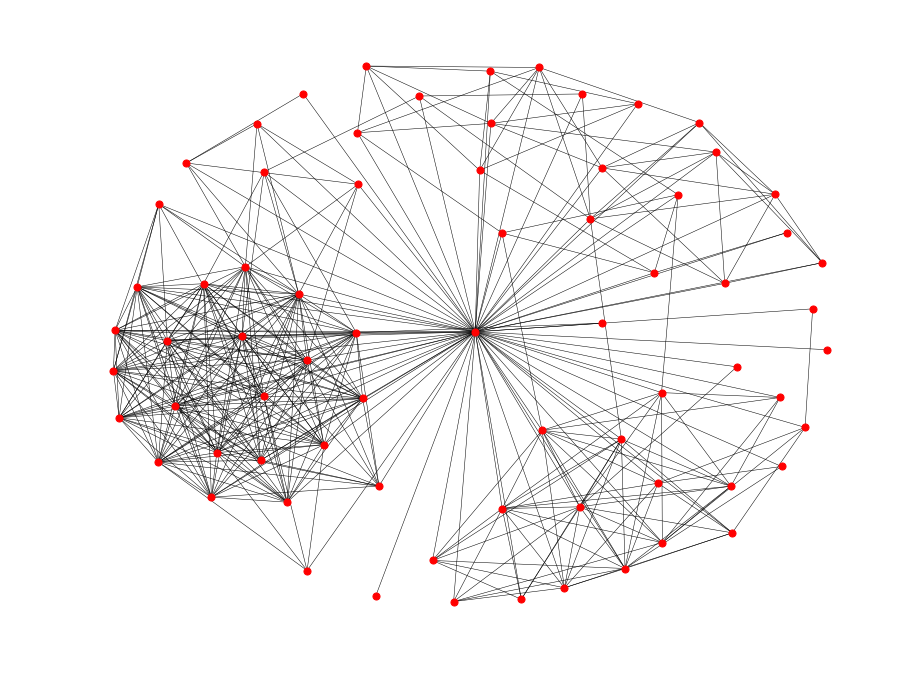

In [10]:
graph_plot()

### Без центральной вершины

In [11]:
g.remove_node(central_users[CENTRAL_USER_ID])

In [12]:
graph_descr(g)

Вершины графа:

Количество - 70
Средний кластерный коэффициент - 0.602887125406
Средняя степень - 9.4


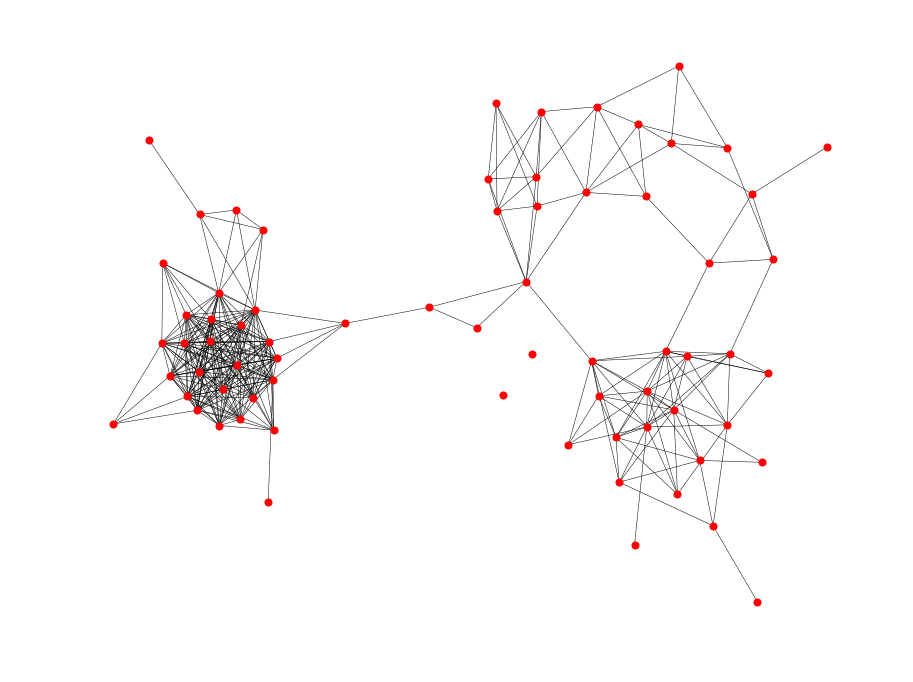

In [13]:
graph_plot()

In [14]:
def graph_save(picture_name, with_labels=False, **kwargs):
    plt.figure(figsize=(60, 45))
    nx.draw_kamada_kawai(g, with_labels=with_labels, node_size=1000, width=1.5, **kwargs)
    plt.savefig(picture_name)

In [19]:
graph_save('my_friends.png')

In [20]:
graph_save('my_friends_labeled.png', with_labels=True, font_size=25, font_color='blue')